In [42]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Data loading
file_path = Path("../Instructions/crypto_data.csv")
df_crypto= pd.read_csv(file_path)
df_crypto.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [13]:
#View data types
df_crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [16]:
df_true = df_crypto[(df_crypto["IsTrading"] == True)]
df_true.head()


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [21]:
#Identify number of null values in the dataset
for column in df_true.columns:
    print(f"Column {column} has {df_true[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [27]:
#Drop null values
df_drop = df_true.dropna(axis=0, how='any')
df_drop

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [28]:
for column in df_drop.columns:
    print(f"Column {column} has {df_drop[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [29]:
#Drop IsTrading, Unnamed, and CoinName
df = df_drop.drop(columns=["IsTrading", "Unnamed: 0", "CoinName"])
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [31]:
#Show final dataframe
df_final = pd.get_dummies(df, columns=["Algorithm", "ProofType"])
df_final.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Scale the data
X_scaled = StandardScaler().fit_transform(df_final)
X_scaled

array([[-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.07661326, -0.03823825, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       ...,
       [-0.0784756 , -0.03823801, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10264677, -0.0382384 , -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282485, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596]])

In [34]:
# Use PCA to for dimensionality reduction
pca = PCA(n_components = 0.90)



In [35]:
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca

array([[-2.26930761e-01,  1.23328568e+00, -4.94638629e-01, ...,
         1.10371192e-12,  4.25122010e-13, -6.99497364e-14],
       [-2.12510663e-01,  1.23187740e+00, -4.95250283e-01, ...,
         1.10250428e-12,  4.26035973e-13, -7.01071016e-14],
       [-1.56502164e-01,  8.20326142e-01, -3.04937434e-01, ...,
         1.44847037e-14,  3.26411621e-15,  4.49825553e-15],
       ...,
       [-1.21196009e-01, -2.31411034e+00,  2.84863433e-01, ...,
         7.40056036e-14, -3.32378005e-14,  5.78446141e-14],
       [-2.77781887e-01, -2.03037929e+00,  2.62190990e-01, ...,
         1.10027225e-12,  4.35508831e-13, -7.41081029e-14],
       [-8.93481494e-02,  7.76901750e-01, -2.04001486e-01, ...,
         1.10245698e-12,  4.29128952e-13, -7.17549043e-14]])

In [36]:
pca.explained_variance_ratio_

array([0.02045753, 0.0192724 , 0.01844088, 0.01837545, 0.01837545,
       0.01837545, 0.01837545, 0.01837545, 0.01834004, 0.01636174,
       0.01569106, 0.01471535, 0.01453436, 0.01430493, 0.0138871 ,
       0.01287343, 0.0114425 , 0.01139971, 0.01096777, 0.01058671,
       0.00994384, 0.00943777, 0.00941956, 0.00934995, 0.00933167,
       0.00931497, 0.00929517, 0.00926174, 0.00924127, 0.0092382 ,
       0.00923197, 0.0092282 , 0.0092282 , 0.0092282 , 0.00922731,
       0.0092206 , 0.00921953, 0.00921467, 0.00921467, 0.00921467,
       0.00921047, 0.00920758, 0.00920614, 0.00920403, 0.00920148,
       0.00920118, 0.0092006 , 0.00920019, 0.00919741, 0.00919541,
       0.00919392, 0.00918772, 0.00918772, 0.00918772, 0.00918772,
       0.00918772, 0.00918772, 0.00918772, 0.00918772, 0.00918772,
       0.00918772, 0.00918772, 0.00918772, 0.00918772, 0.00918772,
       0.00918772, 0.00918772, 0.00918772, 0.00918772, 0.00918772,
       0.00918772, 0.00918772, 0.00918772, 0.00918772, 0.00918

In [39]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

In [40]:
# Check that dimensions have been reduced to two
tsne_features.shape

(685, 2)

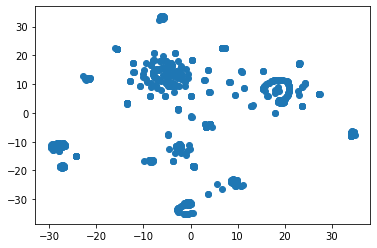

In [43]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [50]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_final)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8.494638e+33
1,2,3.581693e+24
2,3,1.093111e+24
3,4,6.542178e+23
4,5,2.672289e+23


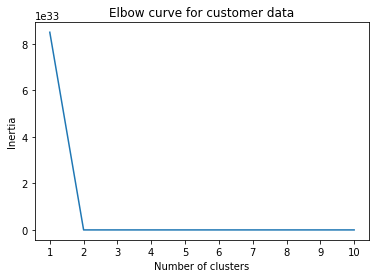

In [51]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryto data')
plt.show()

# Recommendations

#### Cryptocurrency can be grouped to create a classification system. The most effiencient amount of clusters is 2. 